In [4]:
import numpy as np
import pandas as pd
N=np.load('MFCC_N_2500.npy')
S=np.load('MFCC_S_2500.npy')

In [5]:
D=np.concatenate((N,S),axis=0)

In [6]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [15]:
kmeans = KMeans(init="random",n_clusters=100)

In [16]:
kmeans.fit(D)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
       n_clusters=100, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [17]:
Ps=np.zeros(shape=(100,))

In [18]:
Pn=np.zeros(shape=(100,))

In [19]:
for i in range(int(len(kmeans.labels_)/2)):
    Pn[kmeans.labels_[i]]=Pn[kmeans.labels_[i]]+1
for i in range(int(len(kmeans.labels_)/2),len(kmeans.labels_)):
    Ps[kmeans.labels_[i]]=Ps[kmeans.labels_[i]]+1

In [20]:
for i in range(len(Pn)):
    x=Pn[i]+Ps[i]
    Pn[i]=Pn[i]/x
    Ps[i]=Ps[i]/x

In [21]:
y=np.arange(1,101,1)

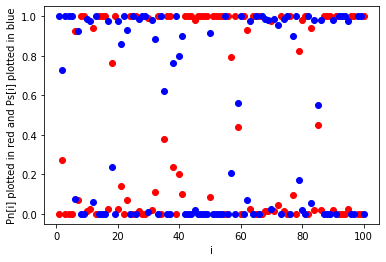

In [25]:
plt.plot(y,Pn,'ro',y,Ps,'bo')
plt.xlabel('i')
plt.ylabel('Pn[i] plotted in red and Ps[i] plotted in blue')
plt.show()